<a href="https://colab.research.google.com/github/seoboran/seaborn_edu/blob/master/200821_seaborn_tutorial_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 불러오기
-   sklearn에 내장되어있는 iris 데이터를 불러온다,

In [2]:
from sklearn.datasets import load_iris 

iris=load_iris()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### pandas를 이용하여 데이터 프레임으로 만들기
 - iris 데이터를 데이터 프레임으로 전환 시켜준다.

In [4]:
from sklearn import datasets
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_iris = sklearn_to_df(load_iris())
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


- 시각화를 위해 column명을 바꿔주고 map 함수를 이용하여 species 데이터를 가공시켜 준다.

In [5]:
temp_data=df_iris.copy()
#print(temp_data.info())

#column명 바꾸기 
temp_data.columns=["sepal_length" ,"sepal_width", "petal_length" ,"petal_width","species"]
#temp_data.info()

#map
# 0->'setosa',1->'versicolor',2->'virginica'
replace_fct={0:'setaosa',1:'versicolor',2:'virginica'}
temp_data['species']=temp_data['species'].map(replace_fct)
print(temp_data.head(3))

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2  setaosa
1           4.9          3.0           1.4          0.2  setaosa
2           4.7          3.2           1.3          0.2  setaosa


# 1.relplot 



## (1) scatter plots

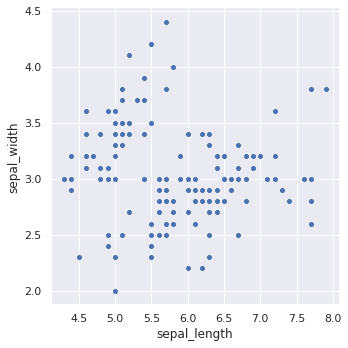

In [6]:
iris=sns.load_dataset("iris")
sns.relplot(x='sepal_length',y='sepal_width',data=iris)

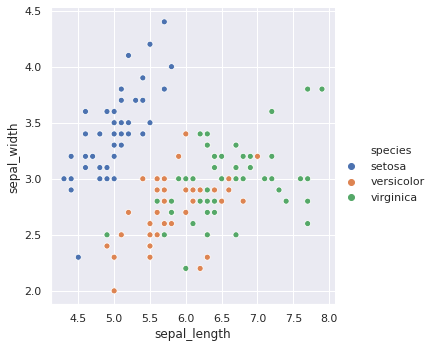

In [7]:
sns.relplot(x='sepal_length',y='sepal_width',hue='species',data=iris)  # hue를 사용하면 hue에 지정한 변수를 기준으로 색깔을 구별해해서 표현

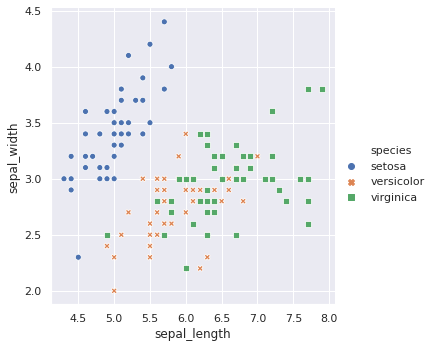

In [8]:
sns.relplot(x='sepal_length',y='sepal_width',hue='species',style='species',data=iris) #style을 사용하면 산점도에서 점의 스타일을 다르게 할 수 있음

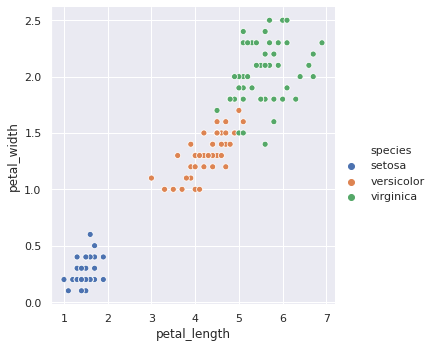

In [9]:
sns.relplot(x="petal_length",y="petal_width",hue='species',data=iris) 

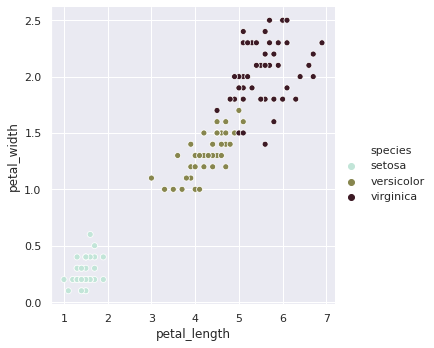

In [10]:
sns.relplot(x="petal_length",y="petal_width",hue='species',palette="ch:r=-5",data=iris) 

## (2) line plot
### - 데이터 셋이 순차적, 연속적이면 line plot을 이용하는것이 효과적이다.

In [11]:
df = pd.DataFrame(dict(petal_width=np.arange(500),
                       petal_length=np.random.randn(500).cumsum()))
# cumsum()함수는 지금까지 나온 값을 모두 누적해주는 함수

In [12]:
df.head()

,petal_width,petal_length
0,0,0.187674
1,1,1.855538
2,2,1.673216
3,3,2.132965
4,4,1.604755


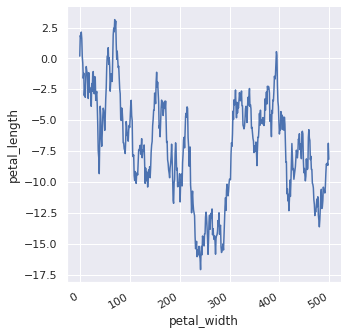

In [13]:
g = sns.relplot(x="petal_width", y="petal_length", kind="line", data=df)
g.fig.autofmt_xdate()

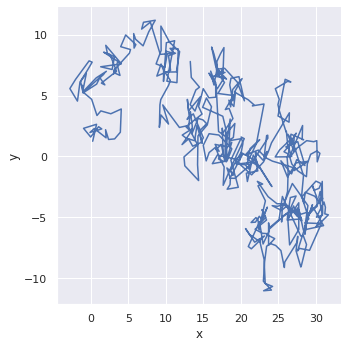

In [14]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df)
# x값이 정렬되지 않았기 때문에 난잡한 그래프가 그려진다.

## (3)집계 및 불확실성 표현 
- 추정 회귀선과 신뢰구간
- lineplot()의 큰 장점은 추정 회귀선과 
신뢰구간을 그릴 수 있다는 것이다.


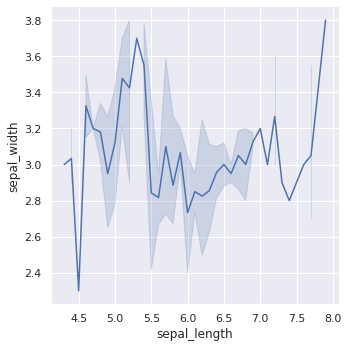

In [15]:
sns.relplot(x='sepal_length', y='sepal_width',kind='line',data=iris)

- 선이 추정회귀선을 나타내고 선 주변에 있는 하늘색 면적이 신뢰구간을 의미한다.

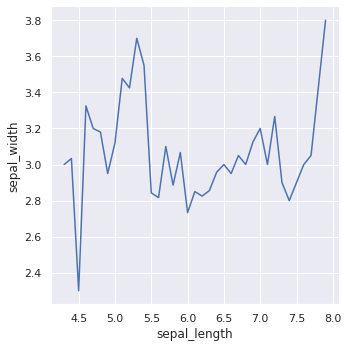

In [16]:
#ci를 이용해 신뢰구간의 범위를 정해 줄 수 있다.
sns.relplot(x='sepal_length', y='sepal_width', ci=None, kind='line',data=iris)

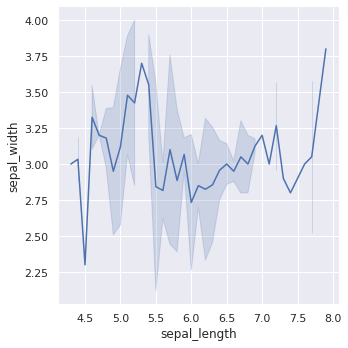

In [17]:
# ci="sd"를 이용해 표준편차를 나타낼 수 있다.
sns.relplot(x='sepal_length', y='sepal_width', ci='sd', kind='line',data=iris)

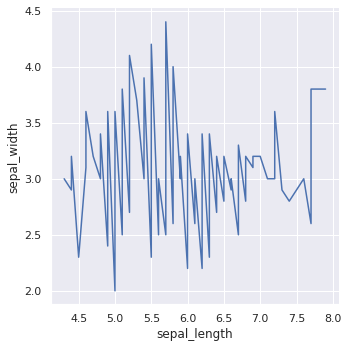

In [18]:
# 추정회귀선도 estimator=None을 이용해 비활성시킬 수 있다.
sns.relplot(x="sepal_length", y="sepal_width", estimator=None, kind="line", data=iris)

- 추정 회귀선을 비활성화하면 하나의 x변수에 y 값이 여러개이기 때문에 그래프가 위와 같이 나타난다.

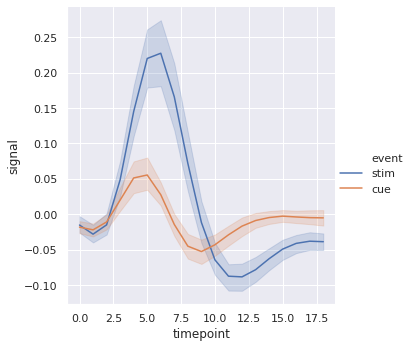

In [46]:
fmri = sns.load_dataset("fmri")
#hue를 이용해 변수에 따라 다른 색으로 표현할 수 있다.
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

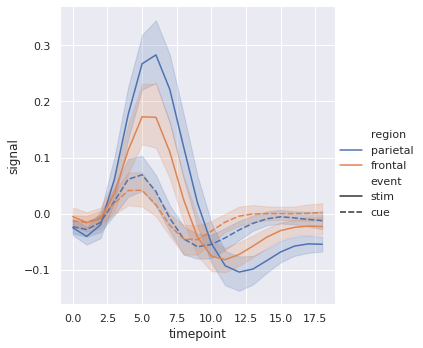

In [48]:
#hue와 style에 변수를 주어 더 많은 클래스로 구분할 수 있다.
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri)

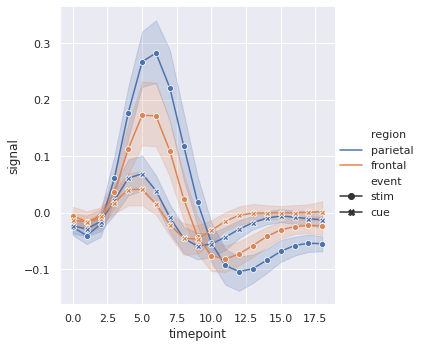

In [49]:
# markers=True를 이용해 marker를 표시할 수 있다.
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri)

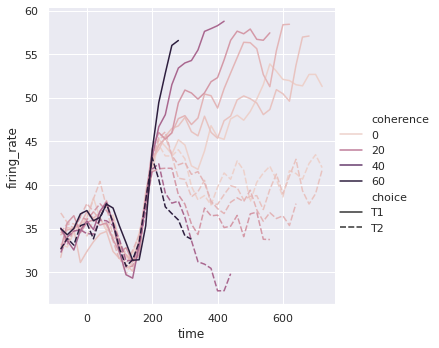

In [19]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

-  sns.cubehelix_palette 밝기가 선형 적으로 감소 (또는 증가)하는 컬러 맵이 생성된다.

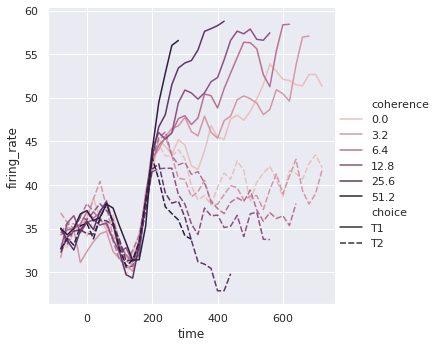

In [20]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

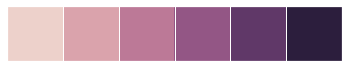

In [22]:
sns.set()
sns.palplot(sns.cubehelix_palette())


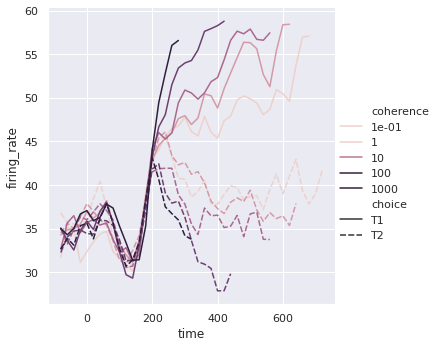

In [21]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line", data=dots);

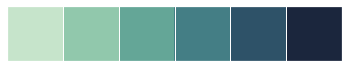

In [23]:
sns.palplot(sns.cubehelix_palette(rot=-.4))

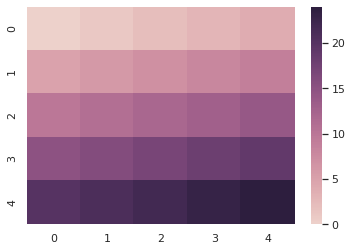

In [24]:
from numpy import arange
x = arange(25).reshape(5, 5)
cmap = sns.cubehelix_palette(as_cmap=True)
ax = sns.heatmap(x, cmap=cmap)

## (4)날짜 데이터
- 선 그림은 실제 날짜 및 시간과 관련된 데이터를 시각화하는데 자주 사용된다.


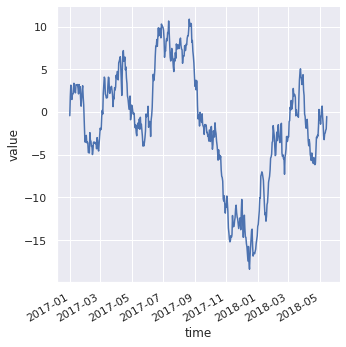

In [25]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

## (5)여러개의 그림그리기 
- hue와 비슷하게 어떤 변수로 데이터를 나눌지 col,row에 입력해주면 된다. 
간단하게 행렬처럼 여러개의 그래프를 나타낸다.

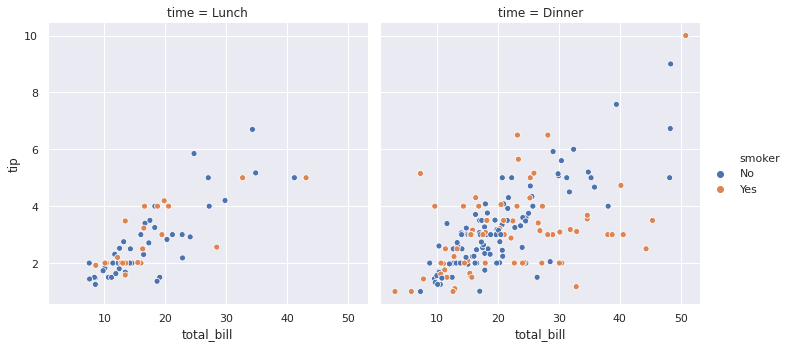

In [27]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

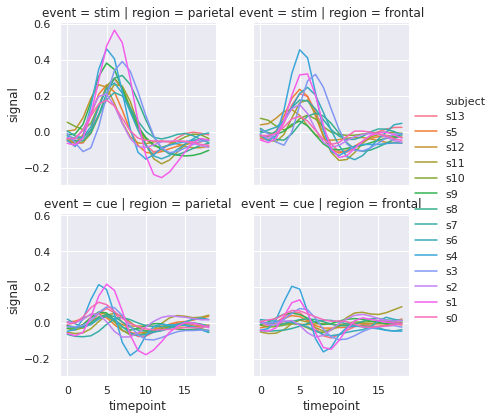

In [50]:
# region,event를 기준으로 
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri)

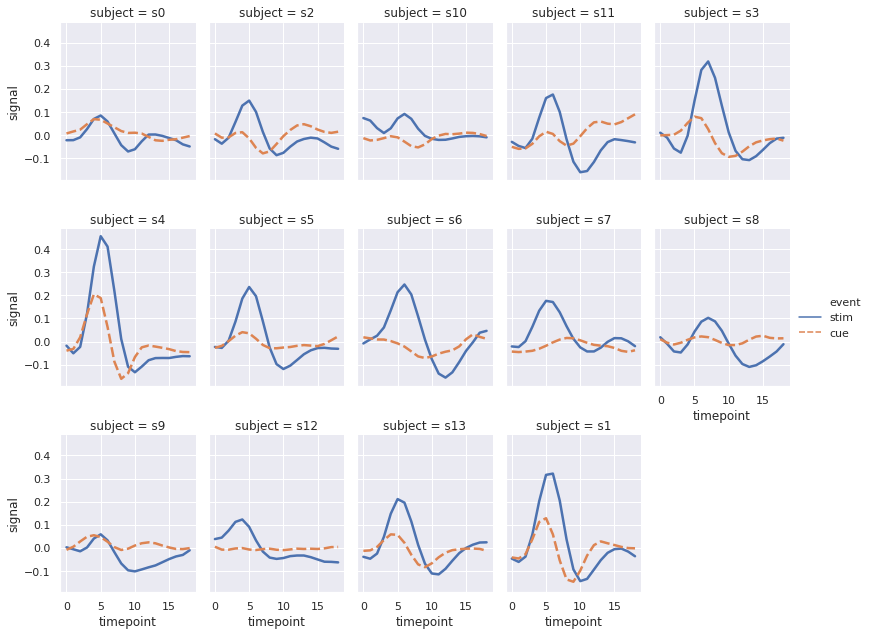

In [51]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))

# 2.catplot
- 범주형 산점도
- 숫자형 변수와 하나 이상의 범주형 변수의 관계를 보여주는 함수이다.

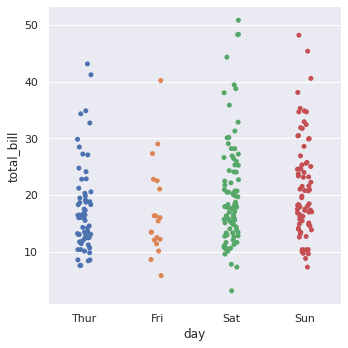

In [30]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips)

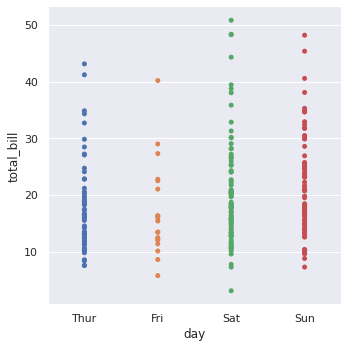

In [33]:
#jitter=False 퍼지는것 없이 한줄로 그려짐 점이 모아진다.
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

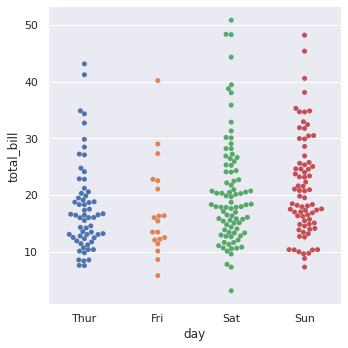

In [34]:
# kind="swarm" 산점도를 표현하고자 할때 사용
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

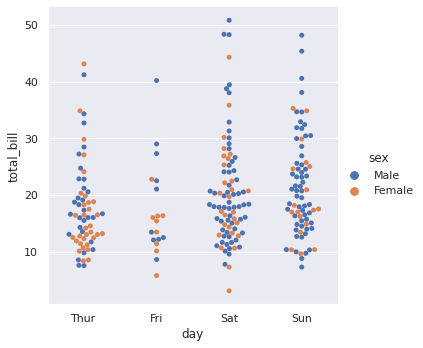

In [35]:
# hue="sex" 성별에 따라 점의 색깔이 다르게 표현됨 
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

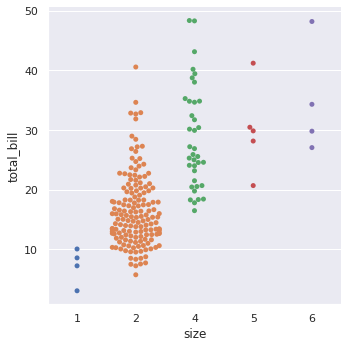

In [36]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"))
#pandas의 query기능을 사용하여 원하는 값만 가져와서 표현됨 
# size != 3 size가 3이 아닌 값만 가져와서 그려준다.

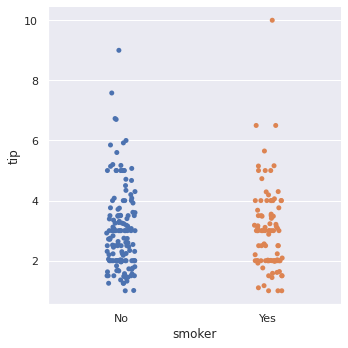

In [37]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips)

## (1)boxplot



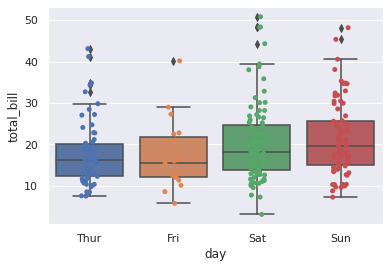

In [59]:
sns.stripplot(x='day',y='total_bill',data=tips)
sns.boxplot(x='day',y='total_bill',data=tips)

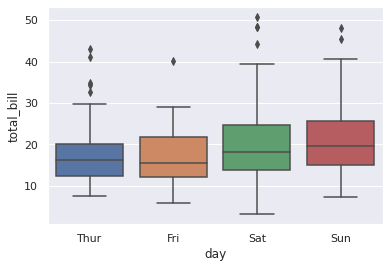

In [61]:
sns.boxplot(x='day',y='total_bill',data=tips)

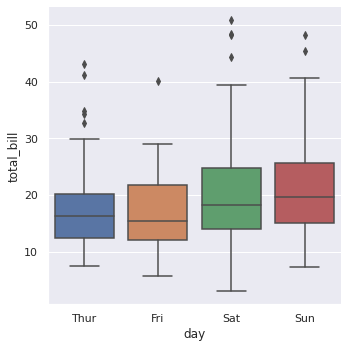

In [40]:
sns.catplot(x='day',y='total_bill',kind='box',data=tips)

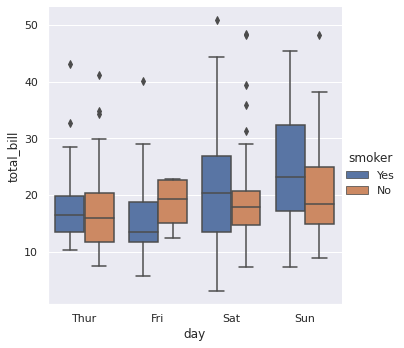

In [41]:
sns.catplot(x='day',y='total_bill',hue='smoker',kind='box',data=tips)

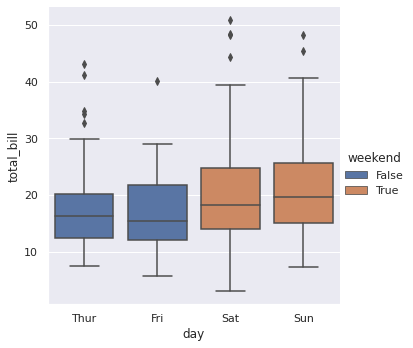

In [42]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips)

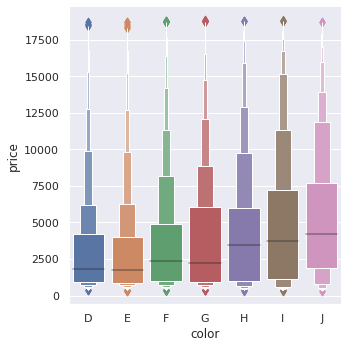

In [43]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"))

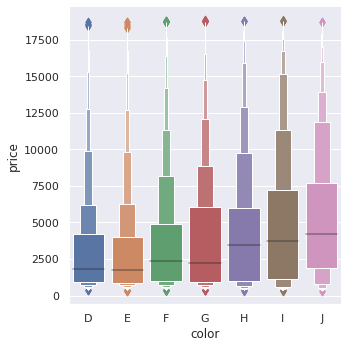

In [64]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"))

## (2)Violinplots

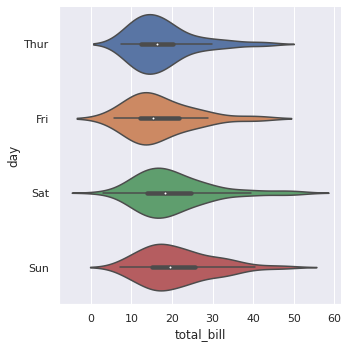

In [62]:
sns.catplot(x="total_bill", y="day",
            kind="violin", data=tips)

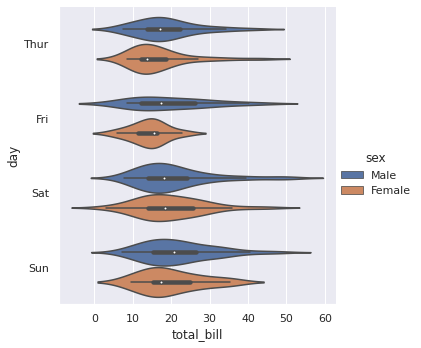

In [44]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips)

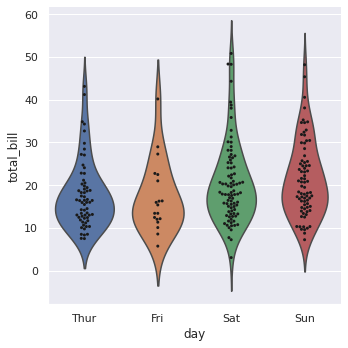

In [45]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

## (3)barplot

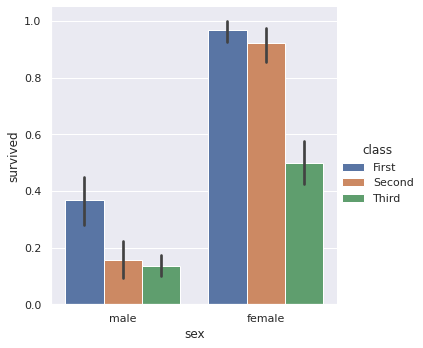

In [52]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

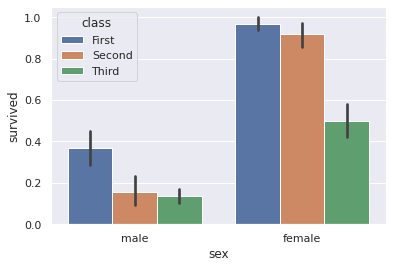

In [76]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

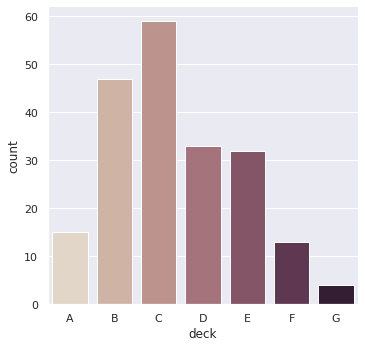

In [54]:
#palette로 색깔 지정이 가능하다.
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic)

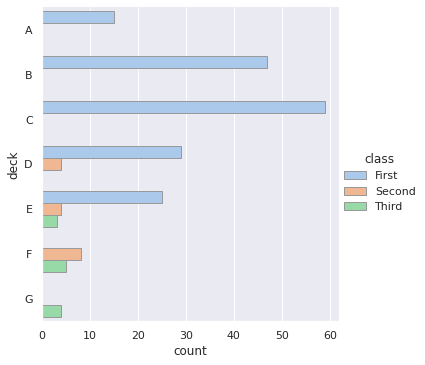

In [53]:
#count는 숫자를 세어 표에 나타내준다.
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic)

## (4)Point plots

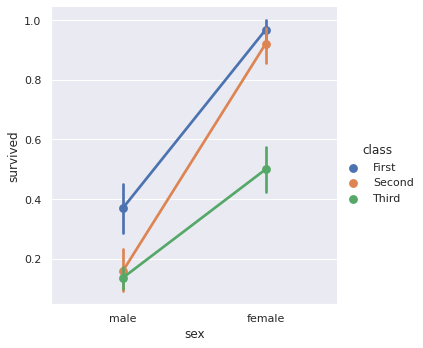

In [55]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

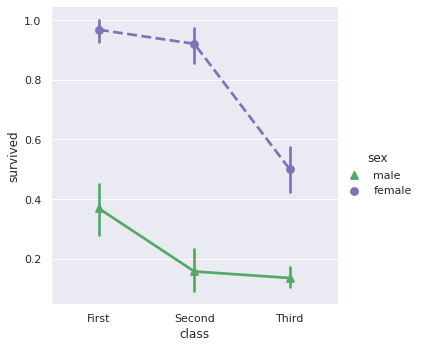

In [56]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic)

## (5)Plotting “wide-form” data

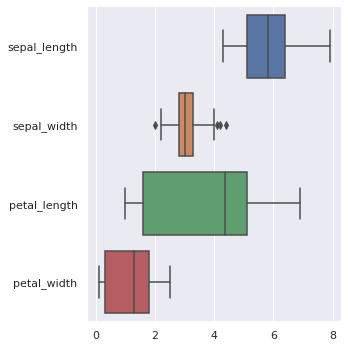

In [65]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box")

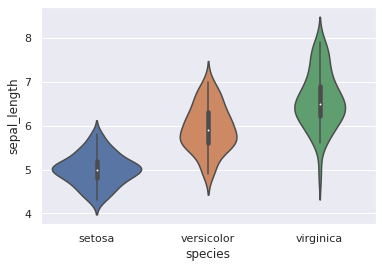

In [66]:
sns.violinplot(x=iris.species, y=iris.sepal_length)

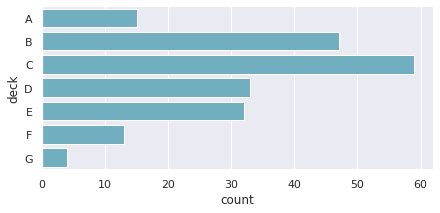

In [67]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c")

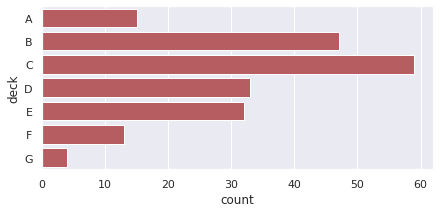

In [68]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="r")

## (6)Showing multiple relationships with facets


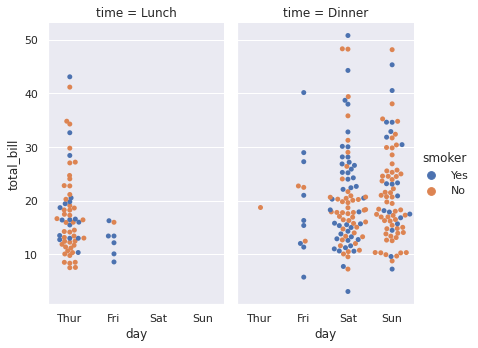

In [69]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips)
# aspect=.6 aspect로 비율지정
# col,row 지정 가능 

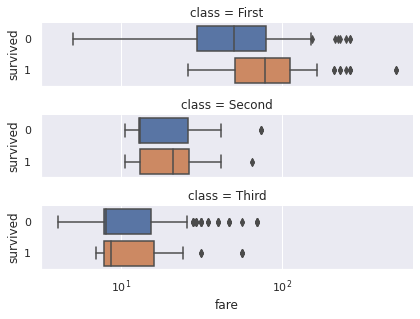

In [70]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log")
# log는 차이가 많이 나서 구분이 잘 안될때 사용 

# 3.distplot
- 수치형 변수에 대해서 1개의 변수,2개의 변수일때 시각화

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [72]:
sns.set(color_codes=True)

- 한개의 변수에 대해서 분포를 시각화 한다.

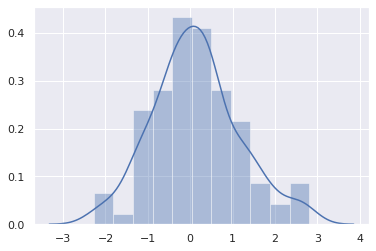

In [75]:
x = np.random.normal(size=100) #normal 정규분포 / size=100 100개의 값을 가짐
sns.distplot(x)

## (1) histograms

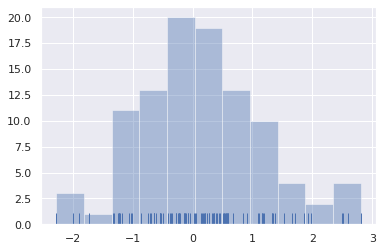

In [77]:
sns.distplot(x, kde=False, rug=True)
# kde 는 곡선 제외하고 그리게됨
# rug 는 값이 몰려있는 것을 카페트 실처럼 확인할 수 있음 

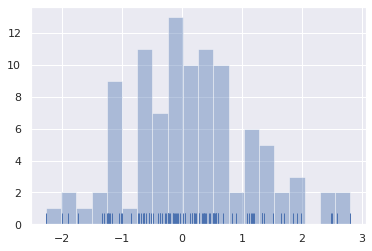

In [78]:
# bin은 몇개의 통에 데이터를 담을 것인지 정하는 것 bin은 데이터를 담는 통을 의미 
sns.distplot(x, bins=20, kde=False, rug=True)

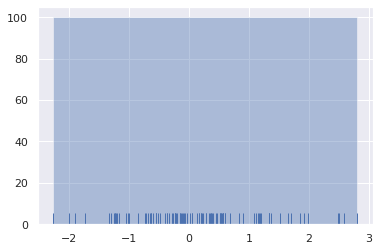

In [79]:
sns.distplot(x, bins=1, kde=False, rug=True)

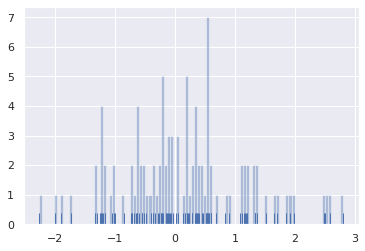

In [80]:
sns.distplot(x, bins=100, kde=False, rug=True)

## (2)Kernel density estimation

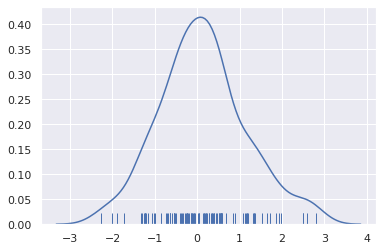

In [81]:
sns.distplot(x, hist=False, rug=True)

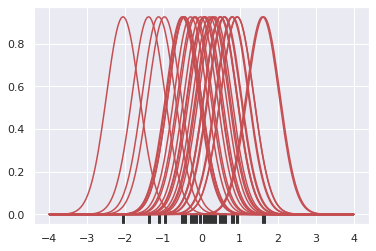

In [82]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3)

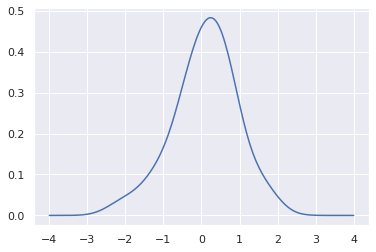

In [83]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density)

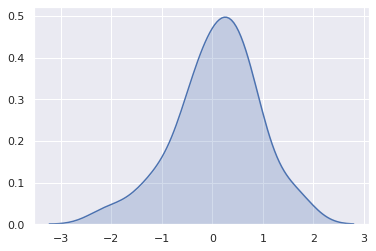

In [84]:
sns.kdeplot(x, shade=True)

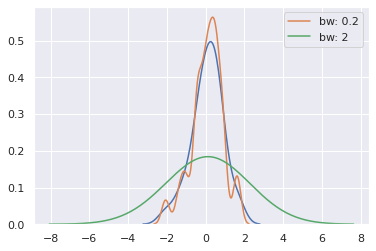

In [85]:
#kdeplot을 마주보게 그린것이 바이올린 plot
# bw= 커널의 사이즈 조절
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

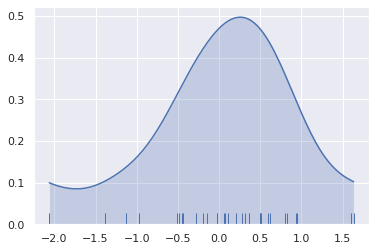

In [86]:
# kdeplot은 rug를 지원하지 않으므로 따로 rugplot해줘야함
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x)

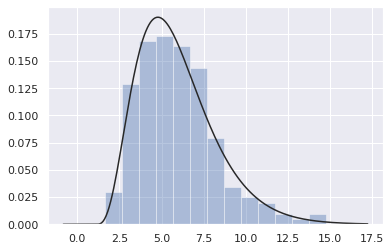

In [87]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)
# fit 은 밀도 정하는 옵션

# 4.Plotting bivariate distributions
- 두개의 변수에 대한 distributions

In [88]:
#2 차원의 정규분포로부터 임의의 데이터 200 개를 만든다.
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

## (1)Scatterplots

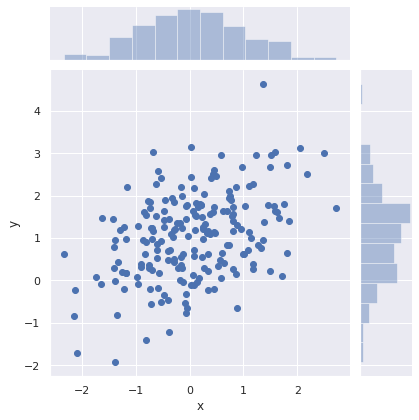

In [89]:
sns.jointplot(x="x", y="y", data=df)

## (2)Hexbin plot
- 지역을 육각형으로 나눈 뒤, 각 부분의 밀도를 색으로 표현

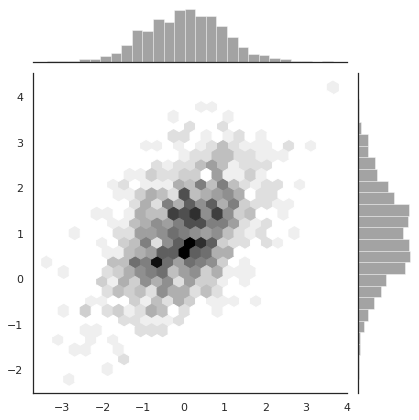

In [90]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

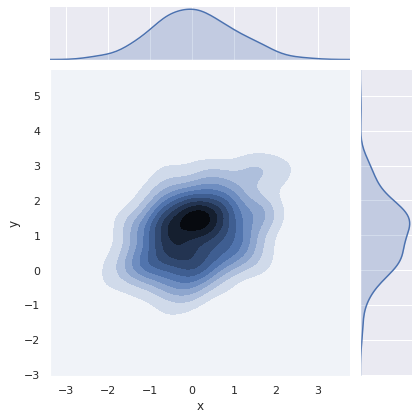

In [91]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

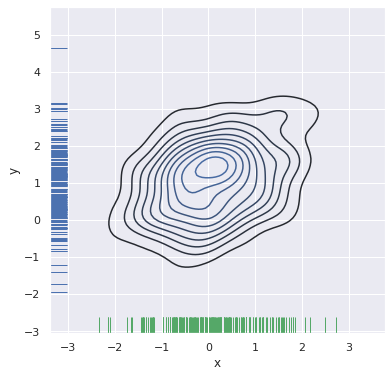

In [92]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

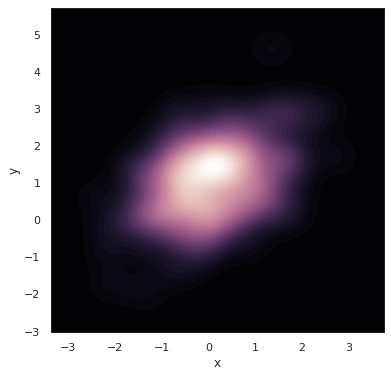

In [93]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)

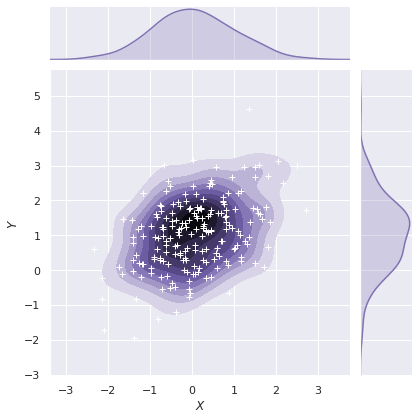

In [94]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

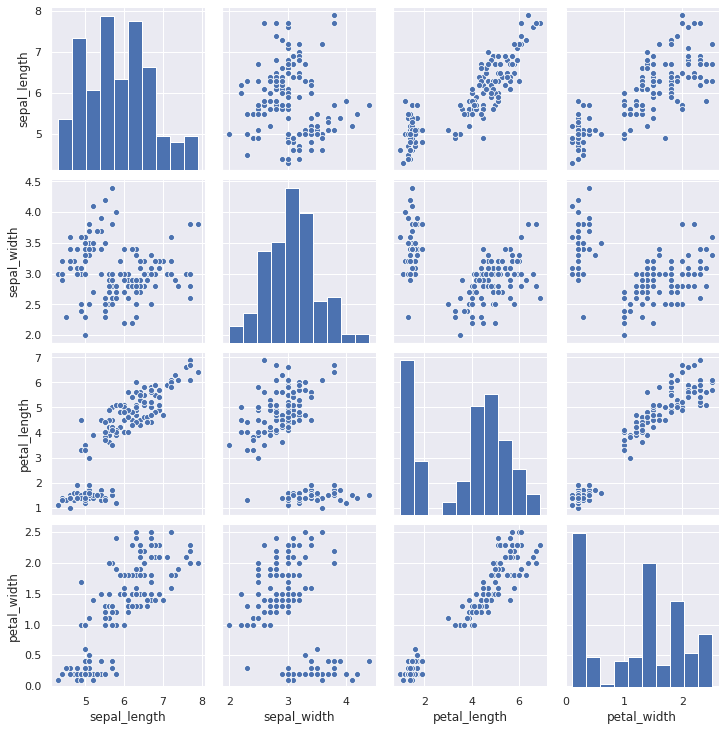

In [95]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

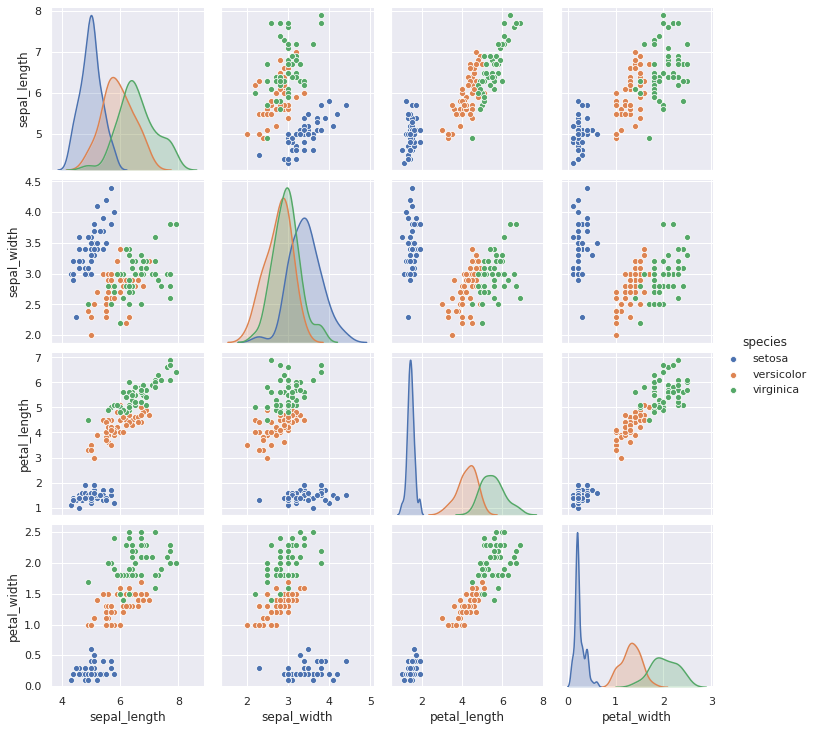

In [96]:
sns.pairplot(iris, hue="species")

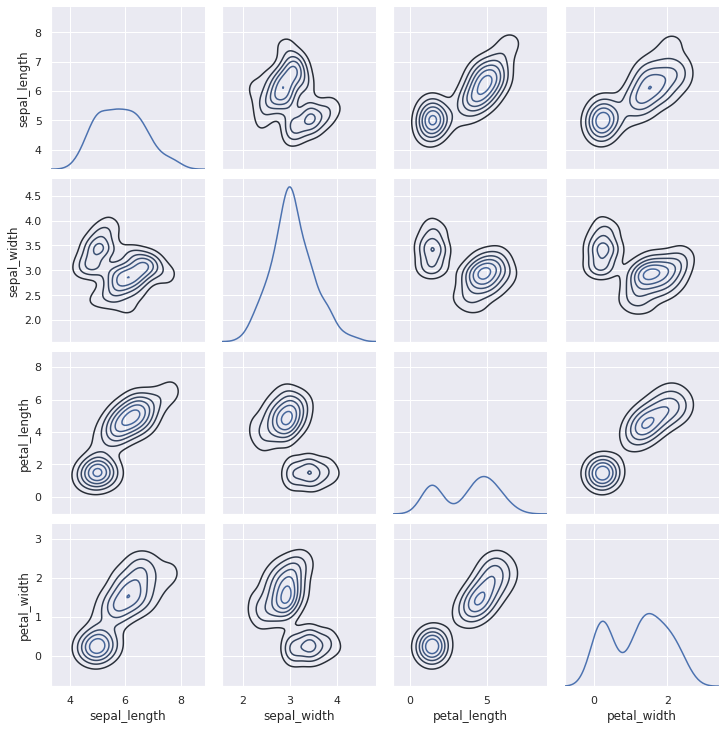

In [97]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

# 5.Visualizing linear relationships

## (1)Linear regression models
- regplot() 은 하나의 그림을 그리는 함수이며, lmplot() 은 row, col 을 설정할 수 있는 multi plot 기능을 제공합니다. 그러므로 regplot() 의 return type 은 AxesSubplot 입니다.

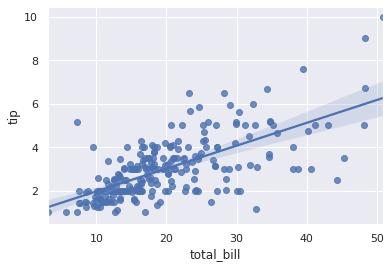

In [98]:
g = sns.regplot(x="total_bill", y="tip", data=tips)

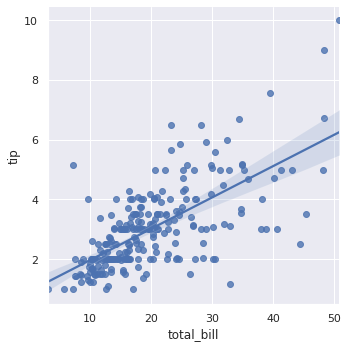

In [99]:
g = sns.lmplot(x="total_bill", y="tip", data=tips)

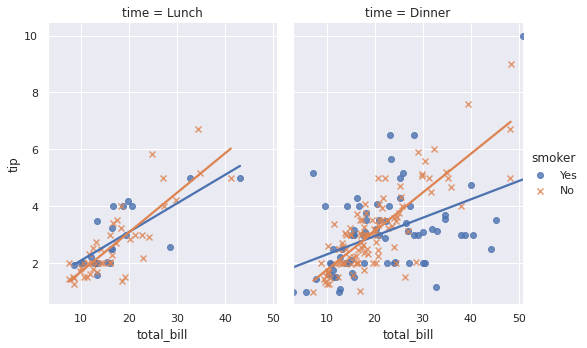

In [100]:
g = sns.lmplot(x="total_bill", y="tip", col="time", aspect=0.75,
    hue="smoker", markers=["o", "x"], ci=None, data=tips)

# (2)Fitting different kinds of models

In [101]:
anscombe = sns.load_dataset("anscombe")

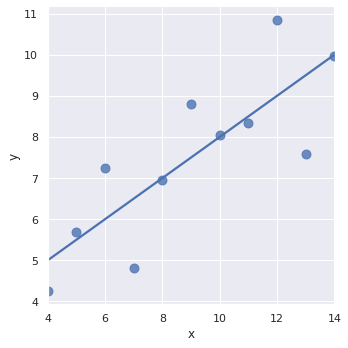

In [102]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

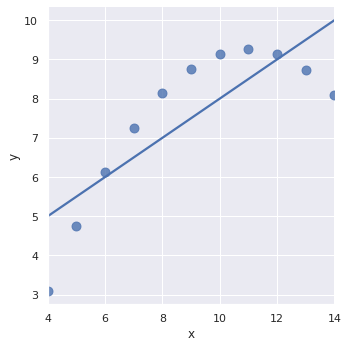

In [103]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80})

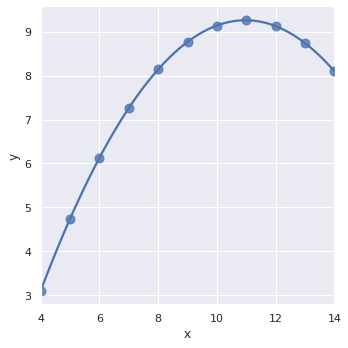

In [104]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

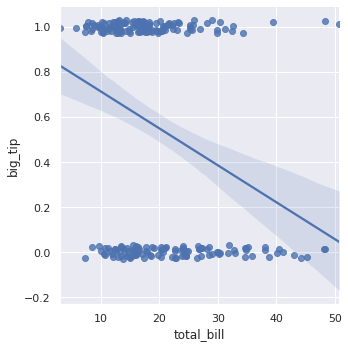

In [105]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03)

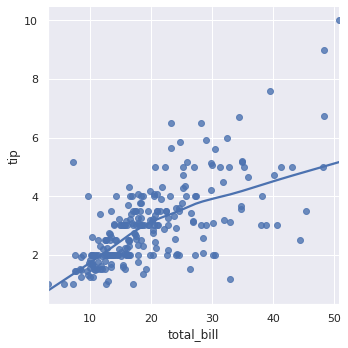

In [106]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True)

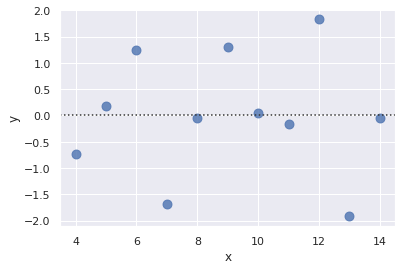

In [107]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80})

## (3)Conditioning on other variables
- lmplot()

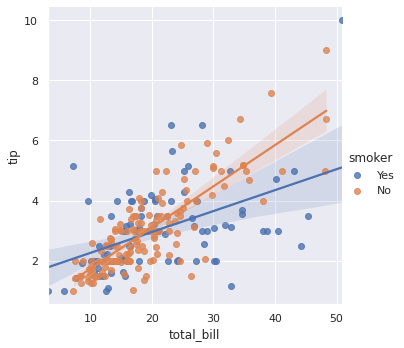

In [108]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

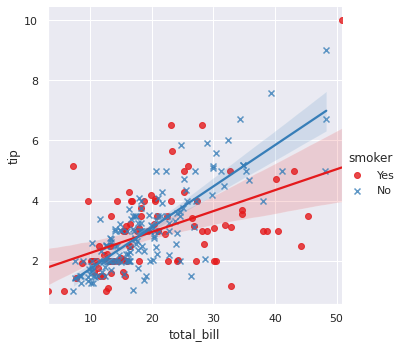

In [109]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1")

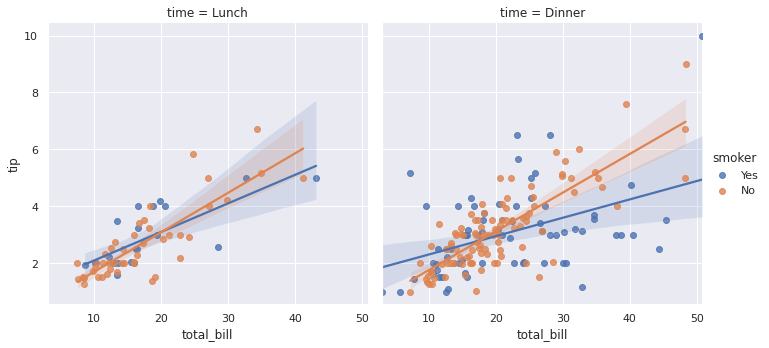

In [110]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

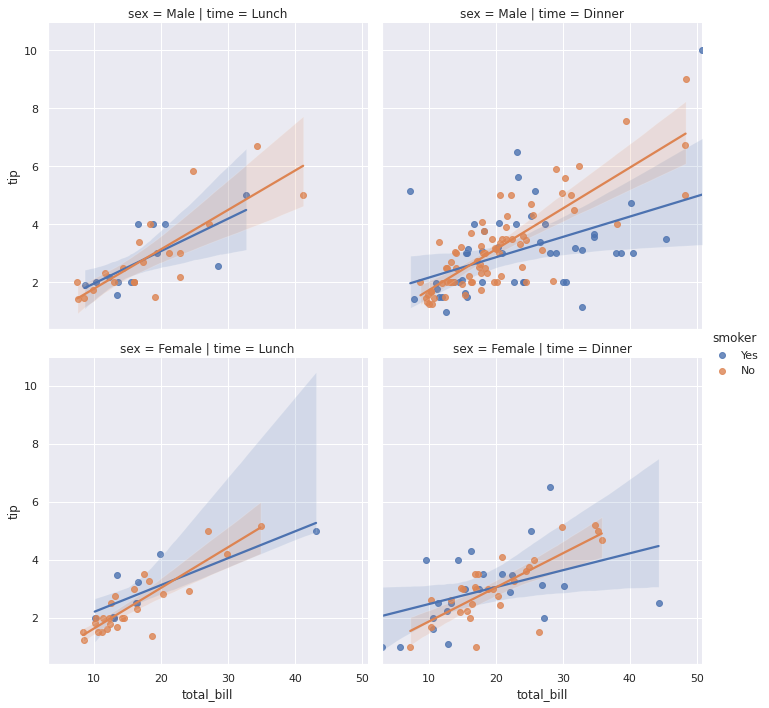

In [111]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips)

## (4)Controlling the size and shape of the plot
- implot(),regplot()

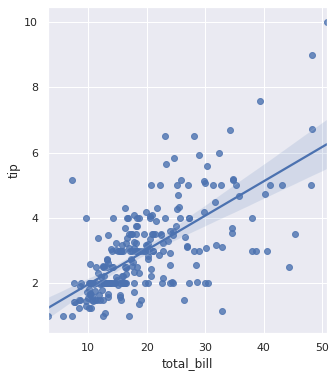

In [114]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax)

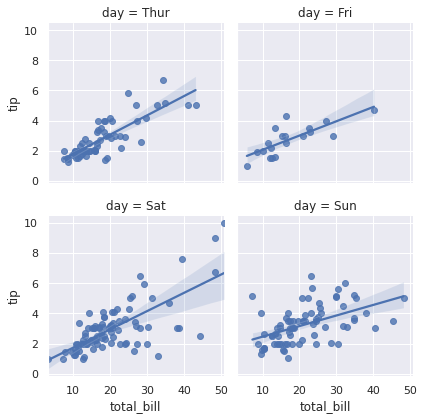

In [115]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3)

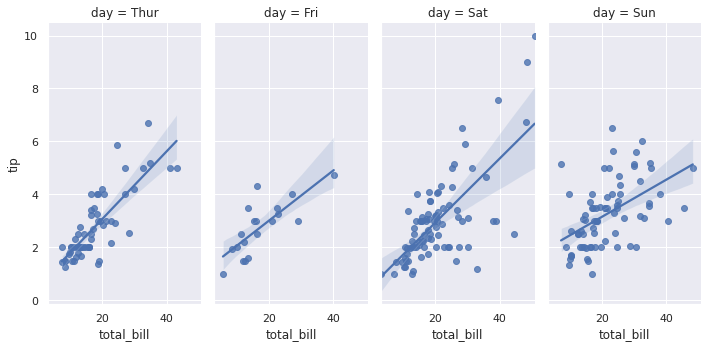

In [116]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5)

## (5)Plotting a regression in other contexts

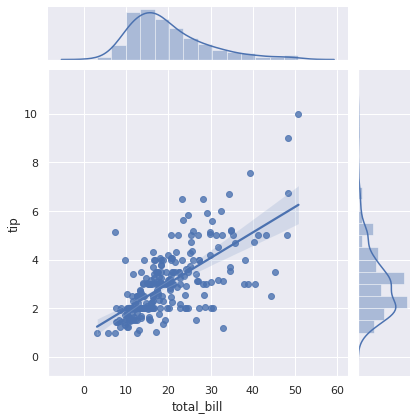

In [117]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

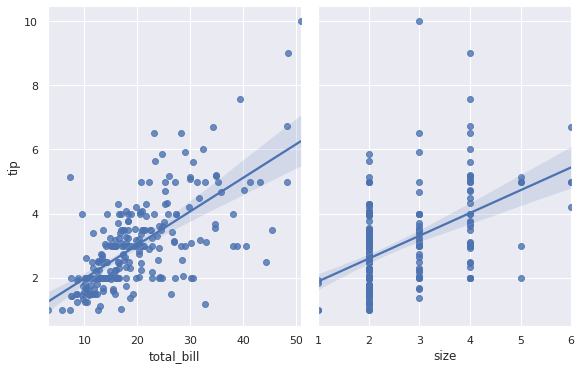

In [118]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");

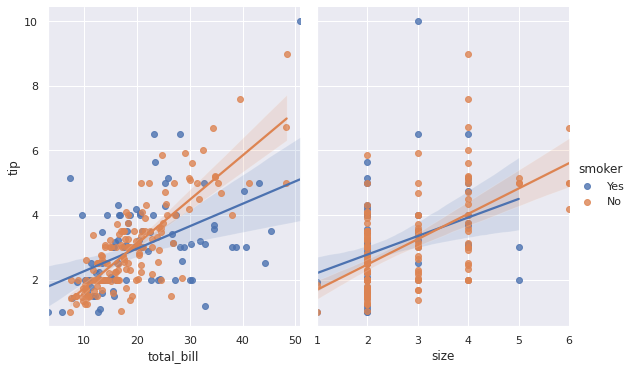

In [119]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");